In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
df = pd.read_csv("taxi-sample.csv",parse_dates=["tpep_pickup_datetime"])
df = df.sample(frac=0.5)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
496354,2,2018-12-29 16:13:23,12/29/2018 04:30:04 PM,1,2.08,1,N,43,230,1,12.0,0.0,0.5,2.56,0.0,0.3,15.36
183538,2,2018-12-31 08:12:10,12/31/2018 08:15:02 AM,1,0.92,1,N,75,236,1,4.5,0.0,0.5,1.00,0.0,0.3,6.30
757292,1,2018-12-28 12:20:01,12/28/2018 12:36:58 PM,1,1.80,1,N,162,48,1,11.5,0.0,0.5,3.50,0.0,0.3,15.80
493305,2,2018-12-29 16:27:49,12/29/2018 04:34:39 PM,1,1.57,1,N,237,262,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80
1031982,2,2018-12-27 06:48:15,12/27/2018 06:54:14 AM,1,1.44,1,N,249,231,1,7.0,0.0,0.5,1.56,0.0,0.3,9.36


In [123]:
df['passenger_count']=df['passenger_count'].astype(int)
print(df['passenger_count'].max())
print(df['passenger_count'].min())

9
0


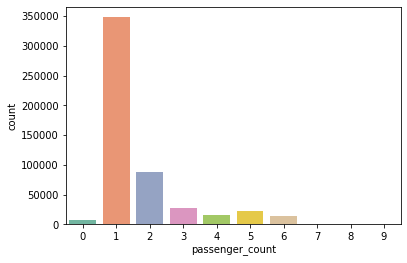

In [129]:
sns.countplot(x='passenger_count',data=df,palette='Set2')

In [130]:
df['pickup_day']=pd.to_datetime(df.tpep_pickup_datetime,format='%Y-%m-%d %H:%M:%S').dt.day
df['pickup_month']=pd.to_datetime(df.tpep_pickup_datetime,format='%Y-%m-%d %H:%M:%S').dt.month
df['pickup_year']=pd.to_datetime(df.tpep_pickup_datetime,format='%Y-%m-%d %H:%M:%S').dt.year
df['pickup_weekday'] = pd.DatetimeIndex(df.tpep_pickup_datetime).dayofweek
df['pickup_hour']=pd.to_datetime(df.tpep_pickup_datetime,format='%Y-%m-%d %H:%M:%S').dt.hour
df['mid_night_trip']=((df['pickup_hour']>23) | (df['pickup_hour']<6)).astype(int)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip
496354,2,2018-12-29 16:13:23,12/29/2018 04:30:04 PM,1,2.08,1,N,43,230,1,...,2.56,0.0,0.3,15.36,29,12,2018,5,16,0
183538,2,2018-12-31 08:12:10,12/31/2018 08:15:02 AM,1,0.92,1,N,75,236,1,...,1.00,0.0,0.3,6.30,31,12,2018,0,8,0
757292,1,2018-12-28 12:20:01,12/28/2018 12:36:58 PM,1,1.80,1,N,162,48,1,...,3.50,0.0,0.3,15.80,28,12,2018,4,12,0
493305,2,2018-12-29 16:27:49,12/29/2018 04:34:39 PM,1,1.57,1,N,237,262,2,...,0.00,0.0,0.3,7.80,29,12,2018,5,16,0
1031982,2,2018-12-27 06:48:15,12/27/2018 06:54:14 AM,1,1.44,1,N,249,231,1,...,1.56,0.0,0.3,9.36,27,12,2018,3,6,0


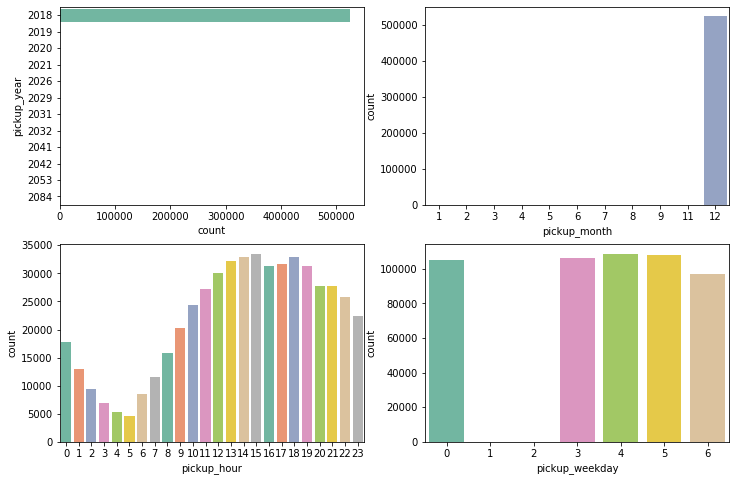

In [131]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(y='pickup_year', data=df,palette='Set2')
plt.subplot(2,2,2)
sns.countplot(x='pickup_month', data=df,palette='Set2')
plt.subplot(2,2,3)
sns.countplot(x='pickup_hour', data=df,palette='Set2')
plt.subplot(2,2,4)
sns.countplot(x='pickup_weekday', data=df,palette='Set2')
plt.show()

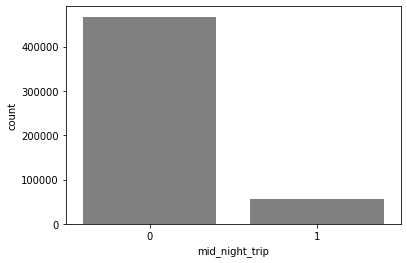

In [139]:
sns.countplot(x='mid_night_trip',data=df,color="gray")

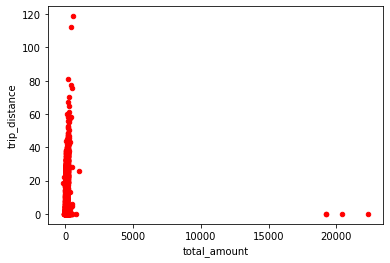

In [138]:
df.plot(x='total_amount',y='trip_distance',kind='scatter',color='red')